# Tarea 6
## Seaborn

In [1]:
# import data
import pandas as pd
# Import the air quality dataset 

terminos = pd.read_csv("../data/Terminos_lagoon_TA_DIC_2023_RawData.csv")

print(terminos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample                   106 non-null    object 
 1   date                     106 non-null    object 
 2   estuary                  106 non-null    object 
 3   area                     106 non-null    object 
 4   station                  106 non-null    object 
 5   layer_depth              106 non-null    object 
 6   season                   106 non-null    object 
 7   chlorophy_microg_l       106 non-null    float64
 8   cond_microsiemens_cm     106 non-null    float64
 9   depth_m                  106 non-null    float64
 10  do_percent_sat           106 non-null    float64
 11  do_mg_l                  106 non-null    float64
 12  sal_psu                  106 non-null    float64
 13  sp_cond_microsiemens_cm  106 non-null    float64
 14  turbidity_fnu            1

load libraries and set color palettes

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 

#create your own color array (viridis)
my_colors = ["#f86e59", "#3b528b"]

# add color array to set_palette
sns.set(font_scale=2, style="ticks", palette= my_colors)

make a boxplot using catplot from seaborn

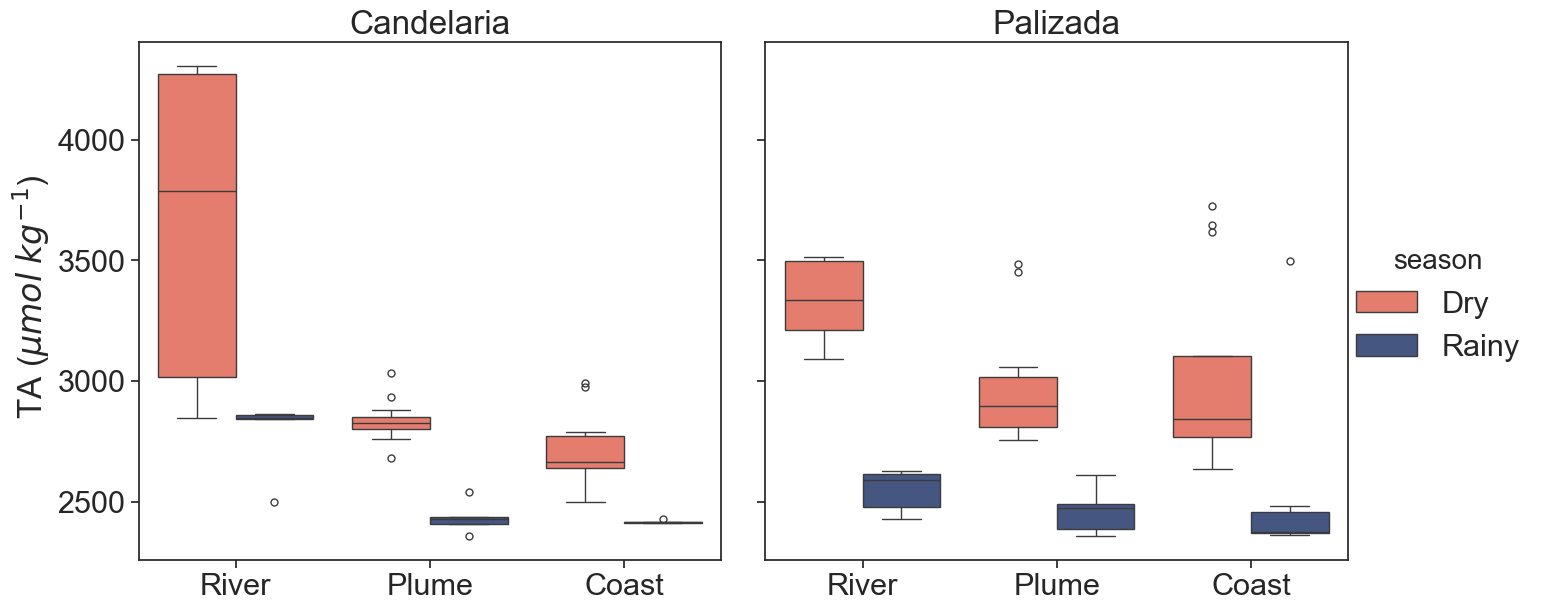

In [3]:
ax = sns.catplot(data=terminos,
                 x="area", y="ta_micromol_kg",
                hue="season", col="estuary",
                kind="box", 
                height=7, aspect=1)

  
ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

three-way ANOVA

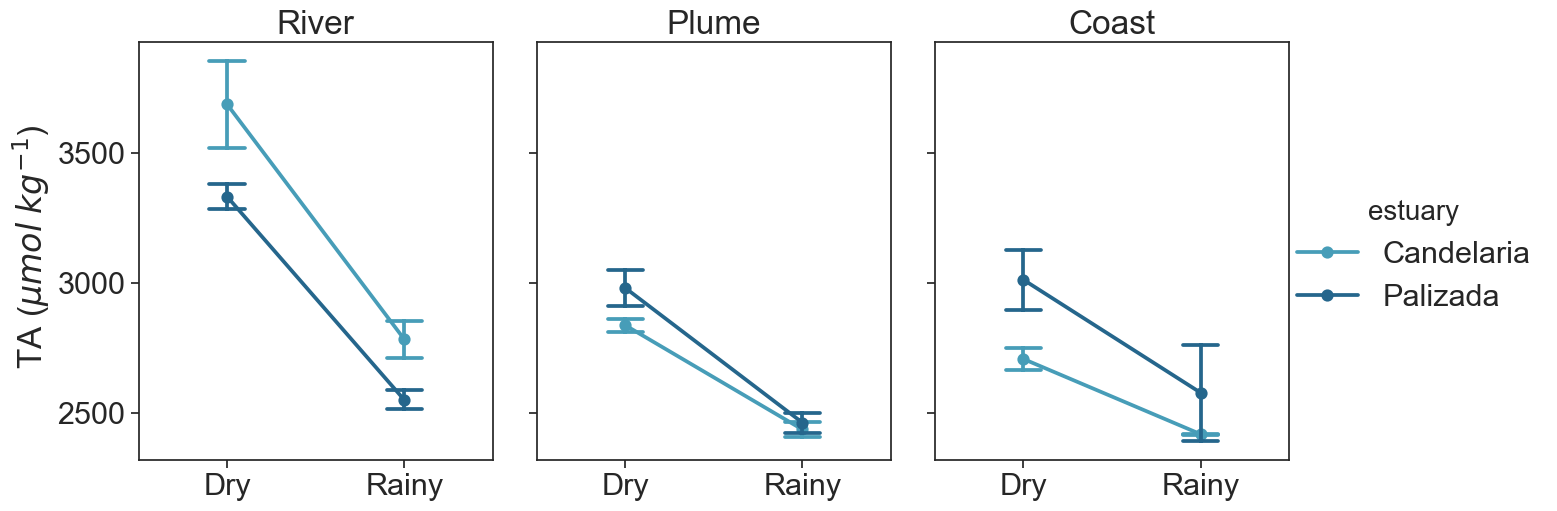

In [4]:
# Draw a pointplot to show pulse as a function of three categorical factors
ax = sns.catplot(
    data=terminos, x="season", 
    y="ta_micromol_kg", hue="estuary", col="area",
    capsize=.2, palette="YlGnBu_d", errorbar="se",
    kind="point", height=6, aspect=.75,
)
ax.despine(left=True)

ax.set(xlabel='', ylabel=' TA ($\mu mol \; kg^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False,right=False)

plt.show()

## EXERCISES
modify units of figures

convert a variable units

In [6]:
# Create a new column with converted units
terminos["ta_mmol_kg"] = terminos["ta_micromol_kg"] / 1000  # µmol to mmol

plot with the new data of converted units

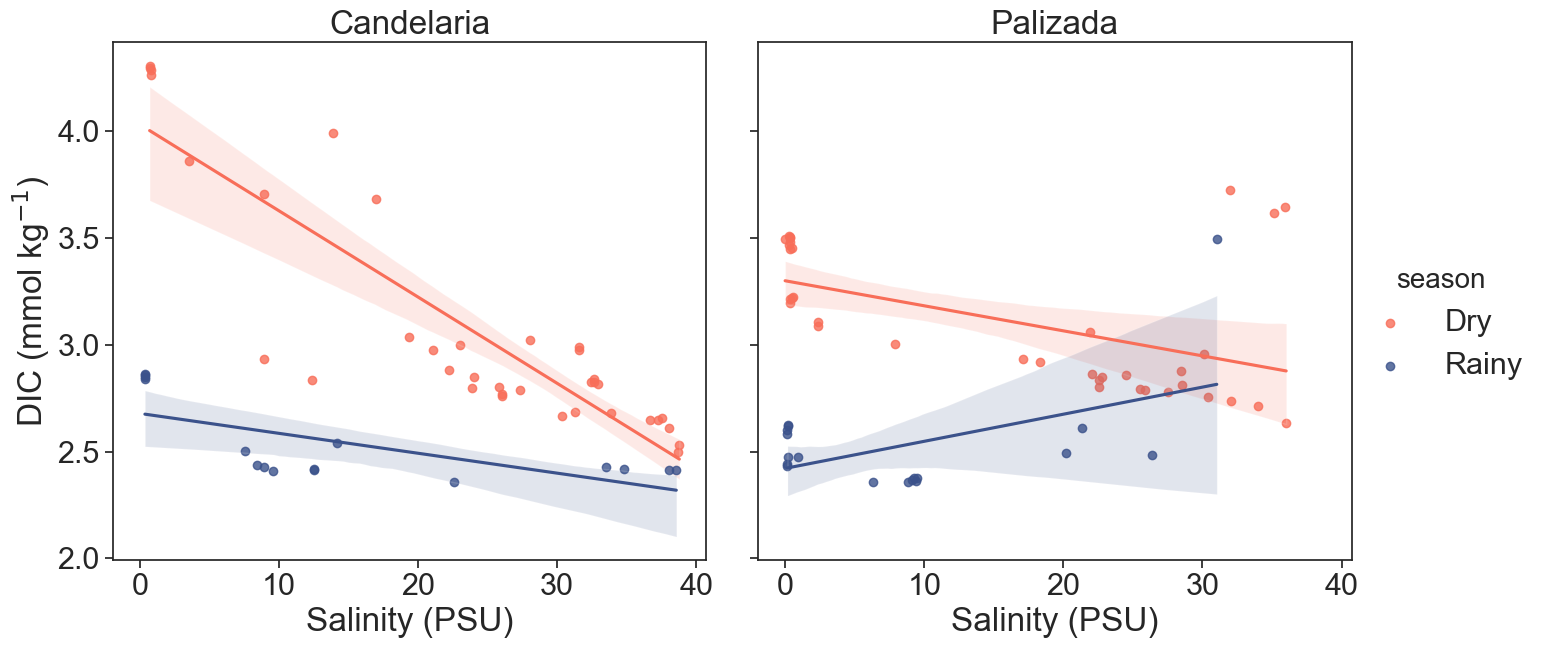

In [7]:
ax = sns.lmplot(x="sal_psu", y="ta_mmol_kg",
                hue="season", col="estuary",
                data=terminos, 
                height=7, aspect=1)

ax.set(xlabel='Salinity (PSU)', ylabel='DIC (mmol kg$^{-1}$)')

ax.set_titles(col_template="{col_name}", row_template="{row_name}")

plt.setp(ax._legend.get_title(), fontsize=20)

sns.despine(top=False, right=False)

plt.show()

create a new figure

Simulate species abundance data

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate names of sites and species
sites = [f"Site_{i}" for i in range(1, 11)]  # 10 sites
species = [f"Species_{i}" for i in range(1, 21)]  # 20 species

# Simulate abundance data: Poisson distribution to simulate count data
abundance_data = np.random.poisson(lam=10, size=(len(species), len(sites)))

# Create a DataFrame
abundance_df = pd.DataFrame(abundance_data, index=species, columns=sites)
print(abundance_df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Species_1 to Species_20
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Site_1   20 non-null     int32
 1   Site_2   20 non-null     int32
 2   Site_3   20 non-null     int32
 3   Site_4   20 non-null     int32
 4   Site_5   20 non-null     int32
 5   Site_6   20 non-null     int32
 6   Site_7   20 non-null     int32
 7   Site_8   20 non-null     int32
 8   Site_9   20 non-null     int32
 9   Site_10  20 non-null     int32
dtypes: int32(10)
memory usage: 960.0+ bytes
None


In [10]:
print(abundance_df.head())

           Site_1  Site_2  Site_3  Site_4  Site_5  Site_6  Site_7  Site_8  \
Species_1      12       6      11      14       7       8       9      11   
Species_2       7      11      11       8      12       6       7       8   
Species_3       3       9      13       8       6      13      12      13   
Species_4       8       8      12      15      13      13      10       8   
Species_5       7       8      13      15       8       7       9       6   

           Site_9  Site_10  
Species_1       8       10  
Species_2      10        5  
Species_3       9       14  
Species_4      15        9  
Species_5      16       10  


create heatmap plot

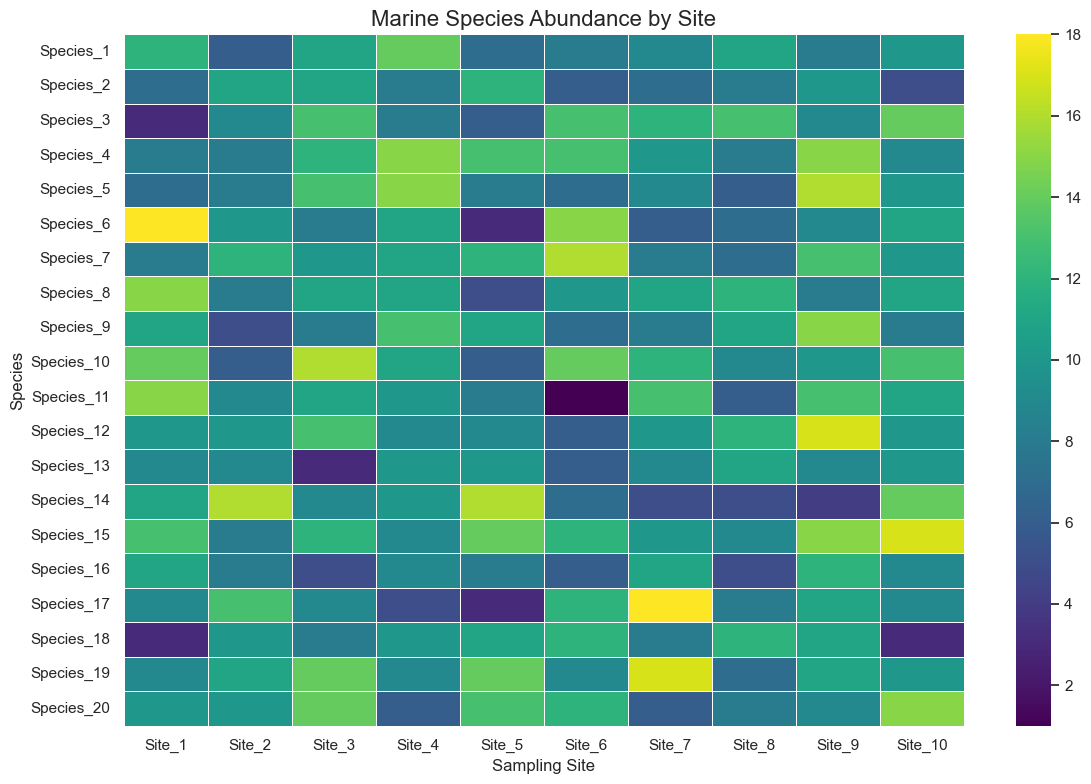

In [11]:
# Set the figure size and style
plt.figure(figsize=(12, 8))
sns.set(font_scale=1.0)

# Create the heatmap
sns.heatmap(abundance_df, cmap="viridis", annot=False, linewidths=0.5)

# Add labels and title
plt.title("Marine Species Abundance by Site", fontsize=16)
plt.xlabel("Sampling Site")
plt.ylabel("Species")

# Show the plot
plt.tight_layout()
plt.show()